# Credit Card Applications

Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report. Manually analyzing these applications is error-prone and time-consuming. Luckily, this task can be automated using machine learning and pretty much every commercial bank does so nowadays. You will build a prediction system to approve/reject  credit card applications using machine learning techniques.

You'll use a dataset of credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. You can download the dataset as follows:

In [1]:
!git clone https://github.com/cvrg-iyte/DATA602repo.git
import pandas as pd
data = pd.read_csv("./DATA602repo/credit.data", header=None)

Cloning into 'DATA602repo'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 77 (delta 9), reused 7 (delta 3), pack-reused 54
Receiving objects: 100% (77/77), 9.09 MiB | 13.82 MiB/s, done.
Resolving deltas: 100% (25/25), done.


This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values which you will need to handle.



- The last attribute is the class attribute, i.e the target value in this 2-class classification problem (positive or negative).
- First, start by analyzing the dataset for numerical and non-numerical values, if it contains values between different ranges and if it has any missing values.
- Then, preprocess the dataset to ensure that we are only feeding numerical values to the machine learning model for predictions.
- Finally, apply machine learning models that can predict if an individual's application for a credit card will be accepted or not. You are supposed to try different classification methods and apply best practices we have seen in the lectures such as grid search, cross validation, regularization etc.

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("./DATA602repo/credit.data", header=None)

# Display the first few rows of the dataset
display(data.head())

# Summary statistics for numerical columns
display(data.describe())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [3]:
# Check for numerical and non-numerical values
# Checking for data types and missing values:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


In [4]:
# Feature and Target Separation
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable
display(X)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750


0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: 15, Length: 690, dtype: object

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Feature and Target Separation
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Convert symbolic values to numerical using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
# Model Building and Evaluation:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and a classifier
pipeline_rf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

# Define hyperparameters for grid search
param_grid_rf = {'randomforestclassifier__n_estimators': [50, 100, 200],
                 'randomforestclassifier__max_depth': [None, 10, 20],
                 'randomforestclassifier__min_samples_split': [2, 5, 10]}

# Apply GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Make predictions on the test set
y_pred_rf = grid_search_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Best Parameters (Random Forest):", best_params_rf)
print("Accuracy (Random Forest):", accuracy_rf)


Best Parameters (Random Forest): {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 50}
Accuracy (Random Forest): 0.8623188405797102


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Feature and Target Separation
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Convert symbolic values to numerical using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
# Model Building and Evaluation:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and a Gradient Boosting classifier
pipeline_gb = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=42))

# Define hyperparameters for grid search
param_grid_gb = {'gradientboostingclassifier__n_estimators': [50, 100, 200],
                 'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2],
                 'gradientboostingclassifier__max_depth': [3, 5, 7]}

# Apply GridSearchCV for hyperparameter tuning
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search_gb.fit(X_train, y_train)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_

# Make predictions on the test set
y_pred_gb = grid_search_gb.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Best Parameters (Gradient Boosting):", best_params_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)


Best Parameters (Gradient Boosting): {'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 200}
Accuracy (Gradient Boosting): 0.855072463768116


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Feature and Target Separation
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Convert symbolic values to numerical using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
# Model Building and Evaluation:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and a Support Vector Machine classifier
pipeline_svm = make_pipeline(StandardScaler(), SVC(random_state=42))

# Define hyperparameters for grid search
param_grid_svm = {'svc__C': [0.1, 1, 10],
                  'svc__kernel': ['linear', 'rbf'],
                  'svc__gamma': ['scale', 'auto']}

# Apply GridSearchCV for hyperparameter tuning
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search_svm.fit(X_train, y_train)

# Get the best parameters
best_params_svm = grid_search_svm.best_params_

# Make predictions on the test set
y_pred_svm = grid_search_svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Best Parameters (Support Vector Machine):", best_params_svm)
print("Accuracy (Support Vector Machine):", accuracy_svm)


Best Parameters (Support Vector Machine): {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Accuracy (Support Vector Machine): 0.8695652173913043


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Feature and Target Separation
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Convert symbolic values to numerical using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
# Model Building and Evaluation:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and a k-Nearest Neighbors classifier
pipeline_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Define hyperparameters for grid search
param_grid_knn = {'kneighborsclassifier__n_neighbors': [3, 5, 7],
                  'kneighborsclassifier__weights': ['uniform', 'distance'],
                  'kneighborsclassifier__p': [1, 2]}

# Apply GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search_knn.fit(X_train, y_train)

# Get the best parameters
best_params_knn = grid_search_knn.best_params_

# Make predictions on the test set
y_pred_knn = grid_search_knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Best Parameters (k-Nearest Neighbors):", best_params_knn)
print("Accuracy (k-Nearest Neighbors):", accuracy_knn)


Best Parameters (k-Nearest Neighbors): {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}
Accuracy (k-Nearest Neighbors): 0.8623188405797102


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Feature and Target Separation
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Convert symbolic values to numerical using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
# Model Building and Evaluation:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and a Decision Tree classifier
pipeline_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))

# Define hyperparameters for grid search
param_grid_dt = {'decisiontreeclassifier__max_depth': [None, 10, 20],
                 'decisiontreeclassifier__min_samples_split': [2, 5, 10]}

# Apply GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search_dt.fit(X_train, y_train)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_

# Make predictions on the test set
y_pred_dt = grid_search_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Best Parameters (Decision Tree):", best_params_dt)
print("Accuracy (Decision Tree):", accuracy_dt)


Best Parameters (Decision Tree): {'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_split': 10}
Accuracy (Decision Tree): 0.8043478260869565


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Feature and Target Separation
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Convert symbolic values to numerical using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
# Model Building and Evaluation:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and a Gaussian Naive Bayes classifier
pipeline_nb = make_pipeline(StandardScaler(), GaussianNB())

# There are no hyperparameters to tune for Gaussian Naive Bayes

# Fit the model
pipeline_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = pipeline_nb.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Accuracy (Gaussian Naive Bayes):", accuracy_nb)


Accuracy (Gaussian Naive Bayes): 0.8188405797101449


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Feature and Target Separation
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Convert symbolic values to numerical using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
# Model Building and Evaluation:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and an XGBoost classifier
pipeline_xgb = make_pipeline(StandardScaler(), XGBClassifier(random_state=42))

# Define hyperparameters for grid search
param_grid_xgb = {'xgbclassifier__n_estimators': [50, 100, 200],
                  'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
                  'xgbclassifier__max_depth': [3, 5, 7]}

# Apply GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_

# Make predictions on the test set
y_pred_xgb = grid_search_xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("Best Parameters (XGBoost):", best_params_xgb)
print("Accuracy (XGBoost):", accuracy_xgb)


Best Parameters (XGBoost): {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 7, 'xgbclassifier__n_estimators': 200}
Accuracy (XGBoost): 0.8478260869565217


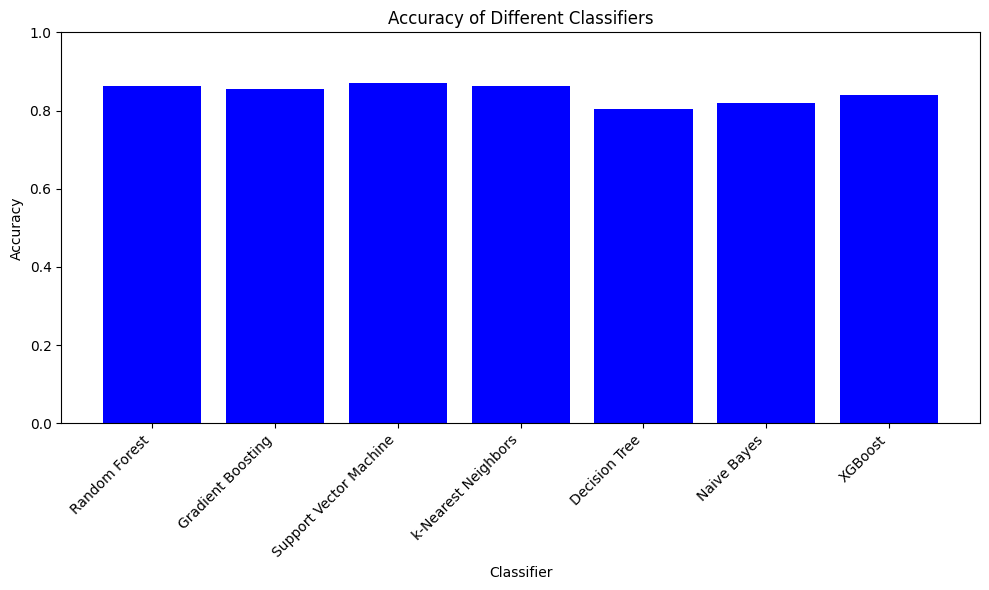

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame and 'target' is the column you want to predict
# Replace 'target' with the actual column name in your dataset
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Convert symbolic values to numerical using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('k-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier(random_state=42))
]

# Dictionary to store accuracy results
accuracy_results = {}

# Iterate through classifiers, train, predict, and store accuracy
for clf_name, clf in classifiers:
    # Create a pipeline with preprocessing and the current classifier
    pipeline = make_pipeline(StandardScaler(), clf)

    # For SVM, XGBoost, and Naive Bayes, no hyperparameter tuning is done
    if clf_name not in ['Support Vector Machine', 'XGBoost', 'Naive Bayes']:
        # Hyperparameter tuning using GridSearchCV for other classifiers
        param_grid = {}
        if clf_name == 'Random Forest':
            param_grid = {'randomforestclassifier__n_estimators': [50, 100, 200],
                          'randomforestclassifier__max_depth': [None, 10, 20],
                          'randomforestclassifier__min_samples_split': [2, 5, 10]}
        elif clf_name == 'Gradient Boosting':
            param_grid = {'gradientboostingclassifier__n_estimators': [50, 100, 200],
                          'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2],
                          'gradientboostingclassifier__max_depth': [3, 5, 7]}
        elif clf_name == 'k-Nearest Neighbors':
            param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7],
                          'kneighborsclassifier__weights': ['uniform', 'distance'],
                          'kneighborsclassifier__p': [1, 2]}
        elif clf_name == 'Decision Tree':
            param_grid = {'decisiontreeclassifier__max_depth': [None, 10, 20],
                          'decisiontreeclassifier__min_samples_split': [2, 5, 10]}

        # Apply GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
        grid_search.fit(X_train, y_train)
        pipeline.set_params(**grid_search.best_params_)

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy and store in the dictionary
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[clf_name] = accuracy

# Plot the bar graph with rotated x-axis labels
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='blue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1 for accuracy values
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Ensure tight layout to prevent clipping of rotated labels
plt.show()
